In [0]:
%matplotlib inline


# Recognizing hand-written digits


An example showing how the scikit-learn can be used to recognize images of
hand-written digits.

This example is commented in the
`tutorial section of the user manual <introduction>`.




In [0]:
# Standard scientific Python imports
import matplotlib.pyplot as plt

In [0]:
# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics

In [0]:
# The digits dataset
digits = datasets.load_digits()
images_and_labels = list(zip(digits.images, digits.target))


In [42]:
images_and_labels[15]

(array([[ 0.,  5., 12., 13., 16., 16.,  2.,  0.],
        [ 0., 11., 16., 15.,  8.,  4.,  0.,  0.],
        [ 0.,  8., 14., 11.,  1.,  0.,  0.,  0.],
        [ 0.,  8., 16., 16., 14.,  0.,  0.,  0.],
        [ 0.,  1.,  6.,  6., 16.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  5., 16.,  3.,  0.,  0.],
        [ 0.,  1.,  5., 15., 13.,  0.,  0.,  0.],
        [ 0.,  4., 15., 16.,  2.,  0.,  0.,  0.]]), 5)

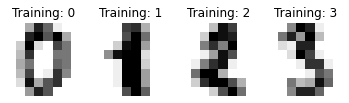

In [43]:
for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)


In [44]:
# To apply a classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))
data.shape

(1797, 64)

In [0]:
# Create a classifier: a support vector classifier
classifier = svm.SVC(gamma=0.001)

In [45]:
# We learn the digits on the first half of the digits
classifier.fit(data[:n_samples // 2], digits.target[:n_samples // 2])

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
# Now predict the value of the digit on the second half:
expected = digits.target[n_samples // 2:]
predicted = classifier.predict(data[n_samples // 2:])

In [47]:
print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

Classification report for classifier SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted a